<a href="https://colab.research.google.com/github/BALAVIDULA/Image_color_clustering/blob/main/Color_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the input image

In [6]:
Image=cv2.imread('/content/drive/MyDrive/projects/image color clustering/thumb-1920-82317.jpg')

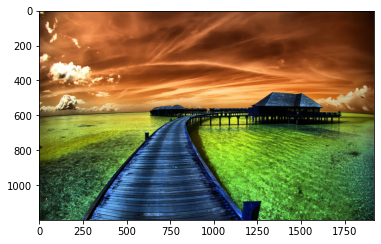

In [7]:
plt.imshow(Image)

Converting to RGB for OpenCV to read the image

In [8]:
Image=cv2.cvtColor(Image,cv2.COLOR_BGR2RGB)

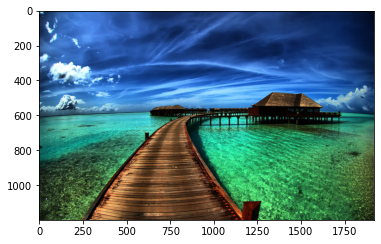

In [9]:
plt.imshow(Image)

For RGB pixel

In [10]:
Image=Image.reshape((Image.shape[1]*Image.shape[0],3))

KMEANS CLUSTERING

In [11]:
kmeans=KMeans(n_clusters=5)
fitting=kmeans.fit(Image)

In [12]:
labels=kmeans.labels_
print(labels)
labels=list(labels)

[0 0 0 ... 0 0 0]


In [13]:
centroid=kmeans.cluster_centers_
print(centroid)

[[ 33.20131631  46.61781536  40.43933395]
 [ 53.69275403 154.851072   101.79657832]
 [144.6653639  102.9693189   63.94621814]
 [ 89.06912381 168.85515791 217.61563788]
 [ 34.12882457  77.12291082 147.50214093]]


In [14]:
percent=[]
for i in range(len(centroid)):
  x=labels.count(i)
  x=x/(len(labels))
  percent.append(x)
print(percent)

[0.27267881944444444, 0.19915581597222223, 0.08048697916666667, 0.18032161458333335, 0.2673567708333333]


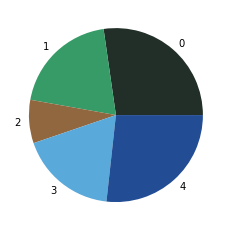

In [15]:
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

In [16]:
output=centroid.shape
output

(5, 3)

In [17]:
values=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(Image)
  op=kmeans.inertia_
  values.append(op)
print(values)

[22792862523.841507, 12169424696.272846, 9489930879.89876, 7155191155.056467, 5727180896.819888, 4605094530.701204, 3811452140.319268, 3272437062.747548, 2852966454.4746237, 2514184849.1966686, 2261487644.6448374, 2070187152.8287554, 1897425596.9664428, 1749343160.4321957, 1651009835.8014722, 1556411832.816155, 1462543716.4182255, 1382233981.9223585, 1307825562.3647351, 1249268014.7327814]


ELBOW METHOD to determine optimal value of k (clusters)

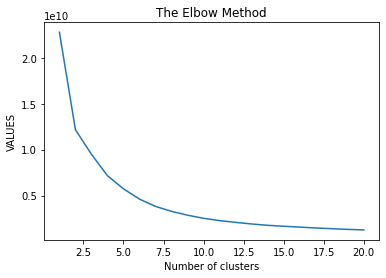

In [18]:
plt.title('The Elbow Method')
plt.plot(list(np.arange(1,21)),values)
plt.xlabel('Number of clusters')
plt.ylabel('VALUES')
plt.show()

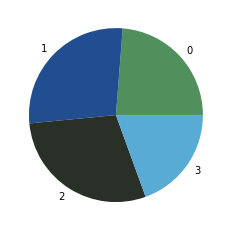

In [23]:
kmeans2=KMeans(n_clusters=4)
fitting2=kmeans2.fit(Image)
labels2=kmeans2.labels_
centroid2=kmeans2.cluster_centers_
labels2=list(labels2)
percent2=[]
for i in range(len(centroid2)):
  j=labels2.count(i)
  j=j/(len(labels2))
  percent2.append(j)
plt.pie(percent2,colors=np.array(centroid2/255),labels=np.arange(len(centroid2)))
plt.show()

In [24]:
output2=centroid.shape
output2

(4, 3)

In [26]:
print(accuracy_score(labels,labels2))

0.831678312549


In [27]:
import pickle
filename = 'color_segment.pkl'
pickle.dump(fitting2,open(filename, 'wb'))